# CIFAR-10 image classifier


In [69]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [70]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize to 0–1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [71]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [72]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [73]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.2601 - loss: 1.9770 - val_accuracy: 0.5098 - val_loss: 1.3145
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5128 - loss: 1.3460 - val_accuracy: 0.6242 - val_loss: 1.0525
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5990 - loss: 1.1278 - val_accuracy: 0.6663 - val_loss: 0.9346
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6491 - loss: 0.9931 - val_accuracy: 0.6944 - val_loss: 0.8573
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6839 - loss: 0.8963 - val_accuracy: 0.7299 - val_loss: 0.7683
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7019 - loss: 0.8466 - val_accuracy: 0.7282 - val_loss: 0.7622
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7253 - loss: 0.7809 - val_accuracy: 0.7606 - val_loss: 0.6834
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7474 - loss: 0.7248 - val_accuracy: 

In [74]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7999 - loss: 0.6061
Test Accuracy: 0.7986999750137329


In [75]:
model.save("cifar10_cnn.h5")

# External Upload

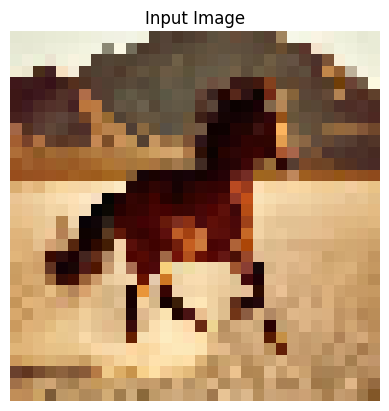

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
Predicted Class: horse


'horse'

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load model
model = load_model("cifar10_cnn.h5")

# CIFAR-10 class names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

def predict_external_image(img_path):
    # Load image and resize to CIFAR-10 (32×32)
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)

    # Normalize
    img_array = img_array.astype("float32") / 255.0

    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)

    # Show image
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis("off")
    plt.show()

    # Prediction
    prediction = model.predict(img_array)
    class_id = np.argmax(prediction)
    class_name = class_names[class_id]

    print("Predicted Class:", class_name)
    return class_name

# Example
predict_external_image("015.png")
